In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [14]:
data = pd.concat(pd.read_pickle(g) for g in [
    "../results/elementary.zip",
    "../results/irw.zip",
    "../results/pegasus.zip",
    "../results/rg.zip"
])
data["graph_set"] = data["graph_set"].apply(lambda i: os.path.basename(i))
data = data.drop(columns="execution_time")

filtered = data[(data["imode"] == "exact") &
                (data["min_sched_interval"] == 0.1) &
                (data["netmodel"].isin(["simple", "minmax"])) &
                (data["cluster_name"].isin(["4x4", "16x4", "stairs16"]))]
grouped = filtered.groupby(["graph_set", "graph_id", "graph_name", "cluster_name", "bandwidth", "scheduler_name", "imode", "min_sched_interval", "sched_time", "netmodel"])
netmodels = grouped["time"].mean().unstack().dropna().reset_index()
netmodels["nm_ratio"] = netmodels["minmax"] / netmodels["simple"]
#irw = netmodels[netmodels["graph_set"]=="irw"]
#irw
print(filtered.graph_set.unique())
irw = filtered[filtered["graph_set"] == "irw"]
elementary = filtered[filtered["graph_set"] == "elementary"]
rg = filtered[filtered["graph_set"] == "rg"]
pegasus = filtered[filtered["graph_set"] == "pegasus"]


['elementary' 'irw' 'pegasus' 'rg']


In [16]:

filtered3 = data[(data["netmodel"] == "minmax") &
                 (data["min_sched_interval"] == 0.1) &
                 (data["netmodel"].isin(["simple", "minmax"])) &
                 (data["cluster_name"].isin(["4x4", "16x4", "stairs16"]))]

In [27]:
def splot(data, col, row, x, y, hue, style=None, sharex=False, sharey=True, ci="sd"):
    g = sns.FacetGrid(data, col=col, row=row, sharey=sharey, sharex=sharex, margin_titles=True)
    def draw(**kw):
        data = kw["data"]
        #data["min_sched_interval"] = data["min_sched_interval"].astype(str)
        #data["bandwidth"] = data["bandwidth"]
        #ax = sns.scatterplot(data=data, x=x, y=y, hue=hue, style=style)
        #ax.set(xscale="log")
        ax = sns.lineplot(data=data, x=x, y=y, hue=hue, style=style, ci=ci)    
        ax.set(xscale="log")
    g.map_dataframe(draw).add_legend()
    

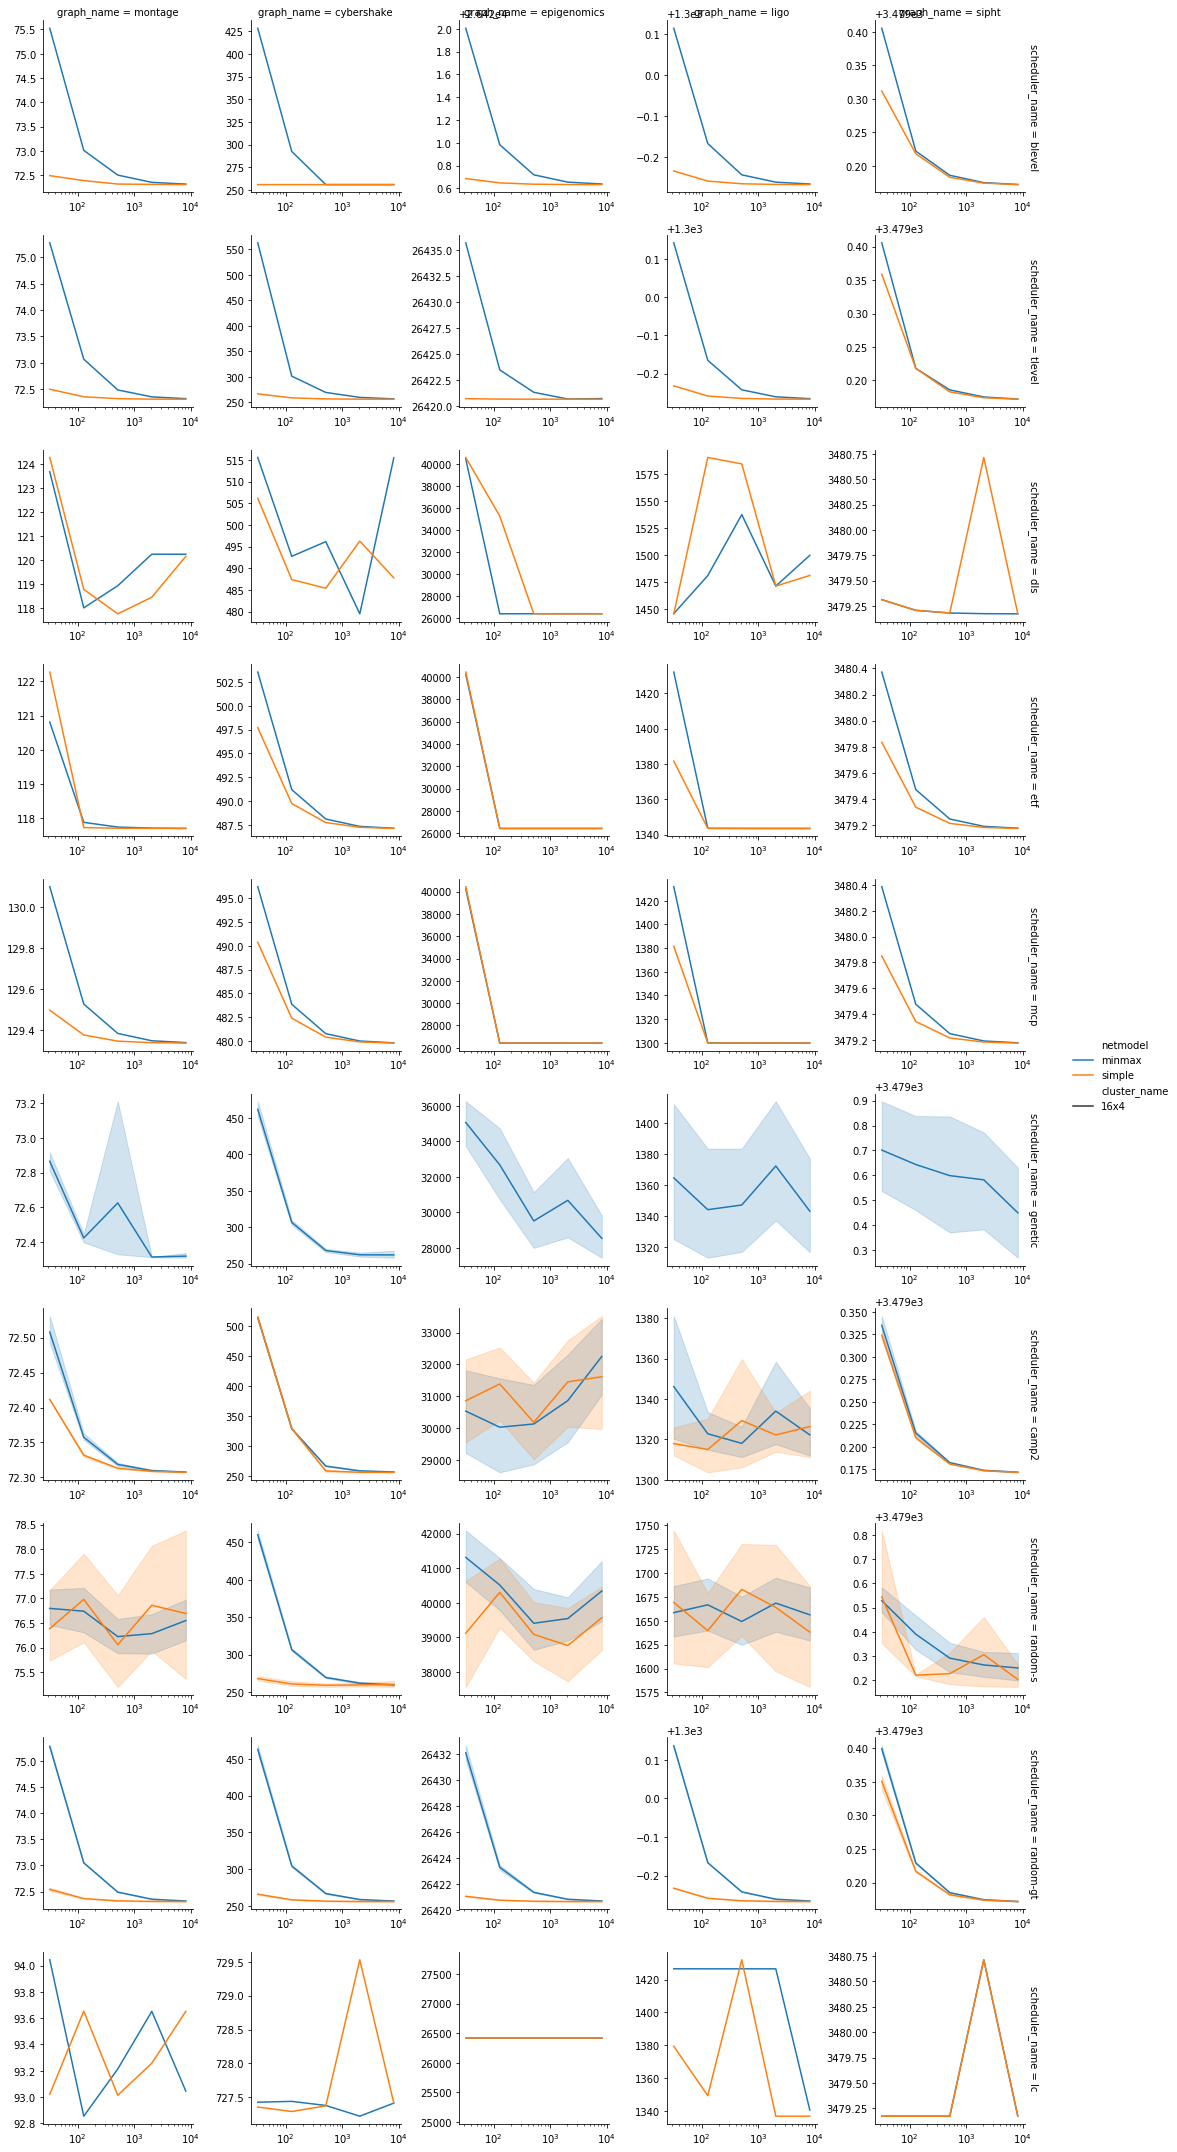

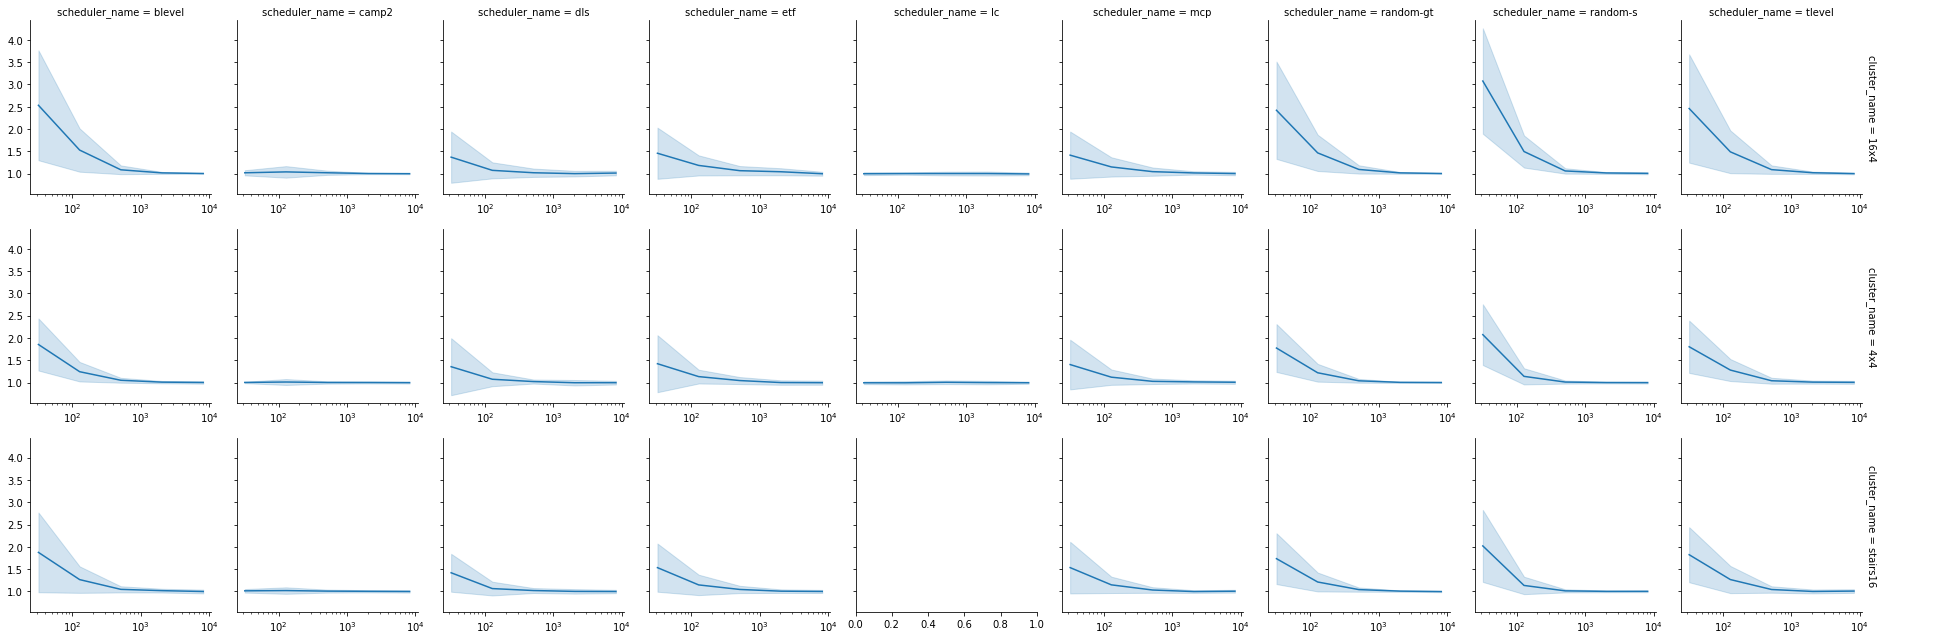

In [26]:
# Netmodel rg
dd = netmodels
firw = dd[(dd["scheduler_name"] != "single") & (dd["graph_set"] == "rg")]
splot(firw, "scheduler_name", "cluster_name", x="bandwidth", y="nm_ratio", hue=None, style=None, sharey=True, ci="sd")

In [61]:
"""grouped = data[(data["imode"] == "exact") &
                (data["netmodel"] == "minmax") &
                (data["cluster_name"].isin(["4x4", "16x4", "stairs16"]))                
              ]
grouped = grouped.groupby(["graph_set", "graph_id", "graph_name", "cluster_name", "bandwidth", "scheduler_name", "imode", "netmodel", "min_sched_interval"])
timings = grouped["time"].mean().unstack().dropna().reset_index()

normalizer = timings[0.1].copy()
keys = (0.0, 0.1, 0.4, 1.6, 6.4)
for x in keys:
    timings[x] /= normalizer
timings = timings.melt(id_vars=["graph_set", "graph_id", "graph_name", "cluster_name", "bandwidth", "scheduler_name", "imode", "netmodel"], value_vars=keys, value_name="interval_ratio")
timings

KeyError: 0

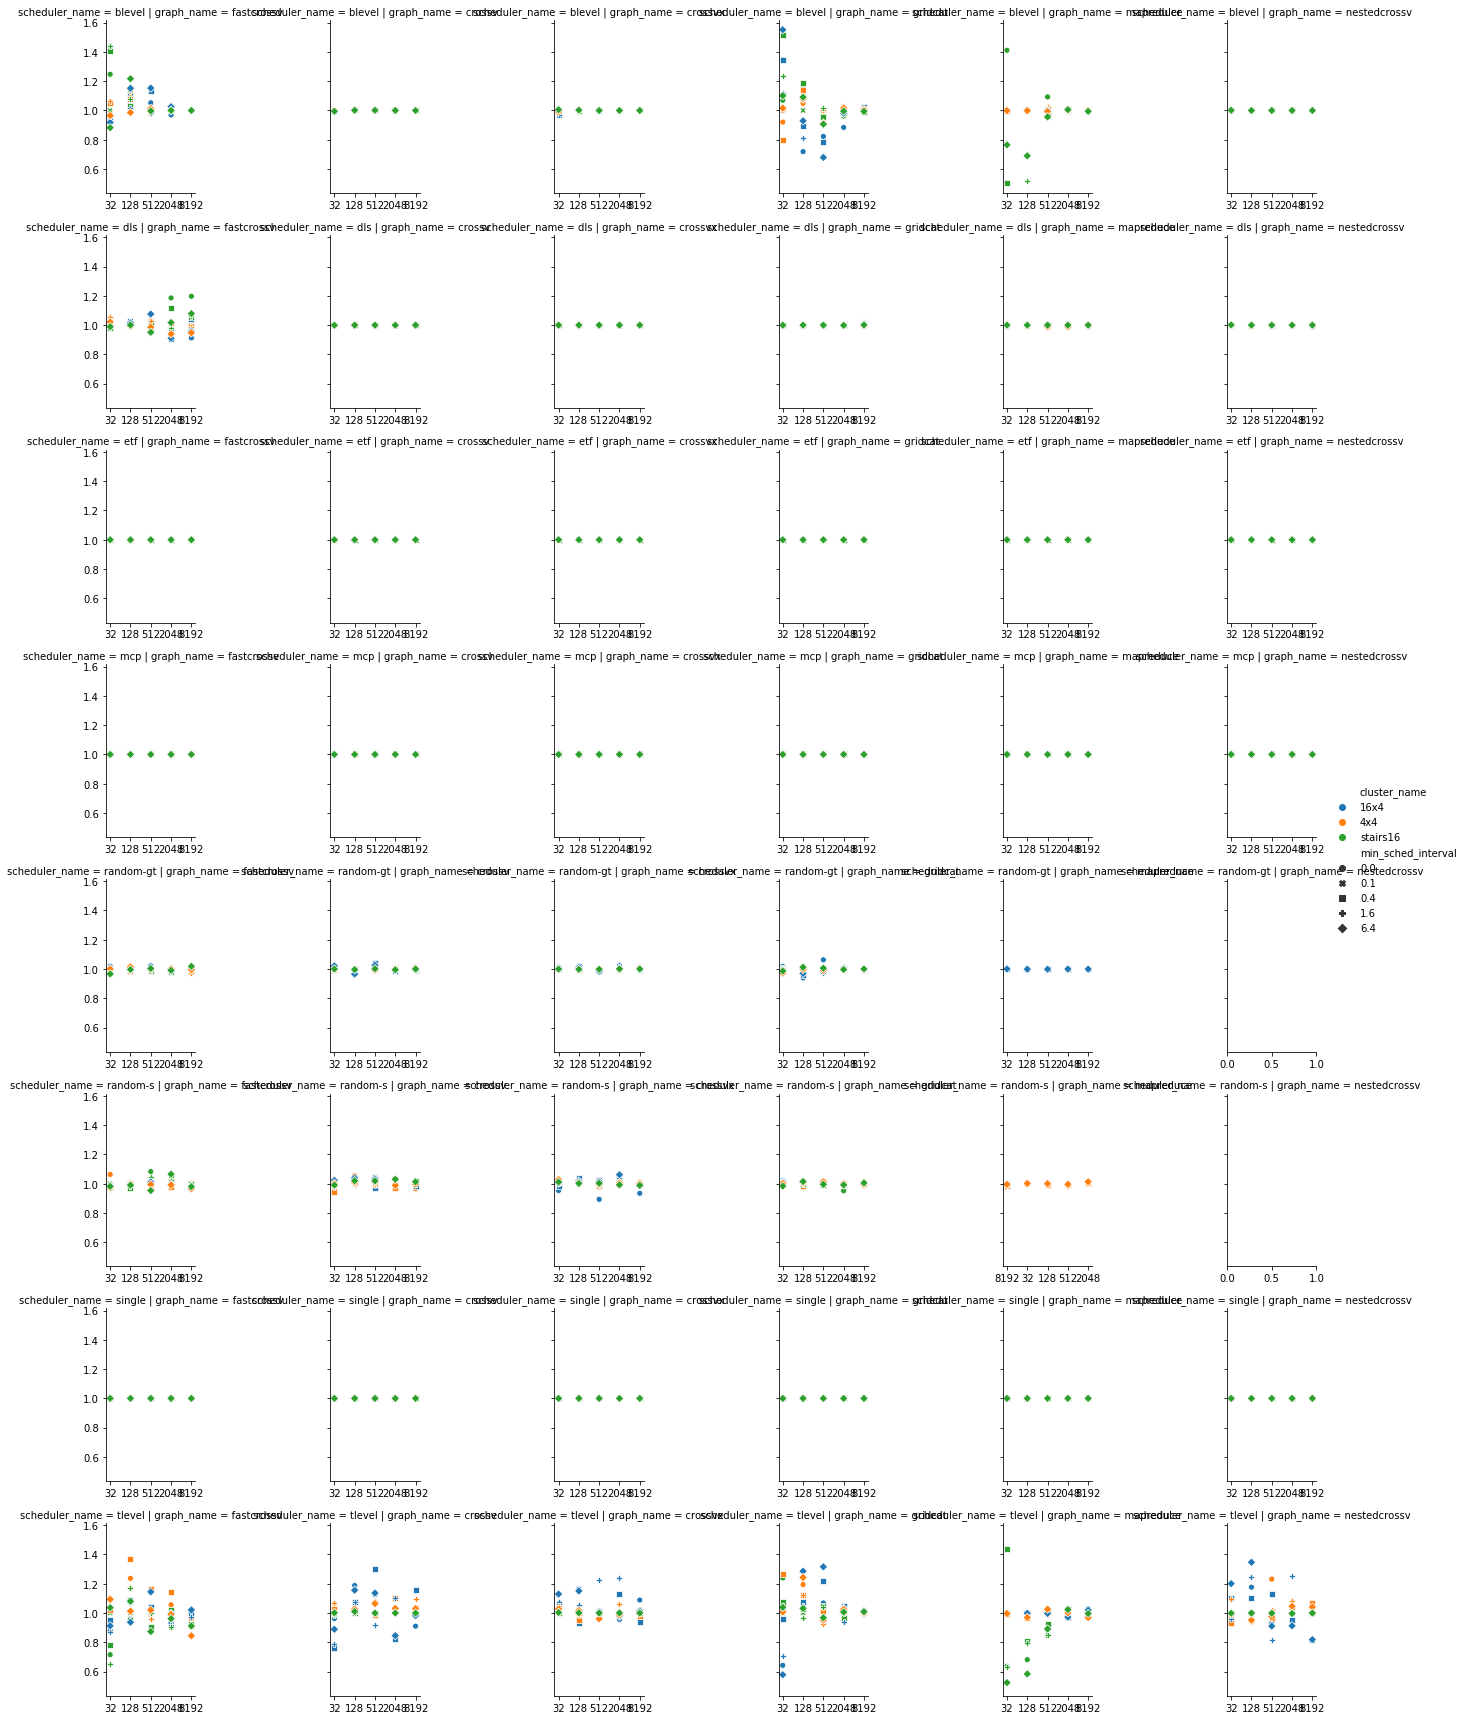

In [20]:
irw = timings[timings["graph_set"] == "irw"]
irw

g = sns.FacetGrid(irw, col="graph_name", row="scheduler_name", sharey=True, sharex=False)
def draw(**kw):
    data = kw["data"]
    data["min_sched_interval"] = data["min_sched_interval"].astype(str)
    data["bandwidth"] = data["bandwidth"].astype(str)
    ax = sns.scatterplot(data=data, x="bandwidth", y="interval_ratio", hue="cluster_name", style="min_sched_interval")
    #ax.set(yscale="log")
g.map_dataframe(draw).add_legend()

In [16]:
grouped = data[(data["min_sched_interval"] == 0.1) &
                (data["netmodel"] == "minmax") &
                (data["cluster_name"].isin(["4x4", "16x4", "stairs16"]))]
grouped = grouped.groupby(["graph_set", "graph_id", "graph_name", "cluster_name", "bandwidth", "scheduler_name", "min_sched_interval", "netmodel", "imode"])
imodes = grouped["time"].mean().unstack().reset_index()

normalizer = imodes["exact"].copy()
keys = ("exact", "mean", "user")
for x in keys:
    imodes[x] /= normalizer
imodes = imodes.melt(id_vars=["graph_set", "graph_id", "graph_name", "cluster_name", "bandwidth", "scheduler_name", "min_sched_interval", "netmodel"], value_vars=keys, value_name="exact_ratio")
imodes

,graph_set,graph_id,graph_name,cluster_name,bandwidth,scheduler_name,min_sched_interval,netmodel,imode,exact_ratio
0,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,blevel,0.1,minmax,exact,1.000000
1,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,camp2,0.1,minmax,exact,1.000000
2,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,dls,0.1,minmax,exact,1.000000
3,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,etf,0.1,minmax,exact,1.000000
4,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,genetic,0.1,minmax,exact,1.000000
5,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,lc,0.1,minmax,exact,1.000000
6,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,mcp,0.1,minmax,exact,1.000000
7,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,random-gt,0.1,minmax,exact,1.000000
8,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,random-s,0.1,minmax,exact,1.000000
9,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,single,0.1,minmax,exact,1.000000


/home/spirali/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


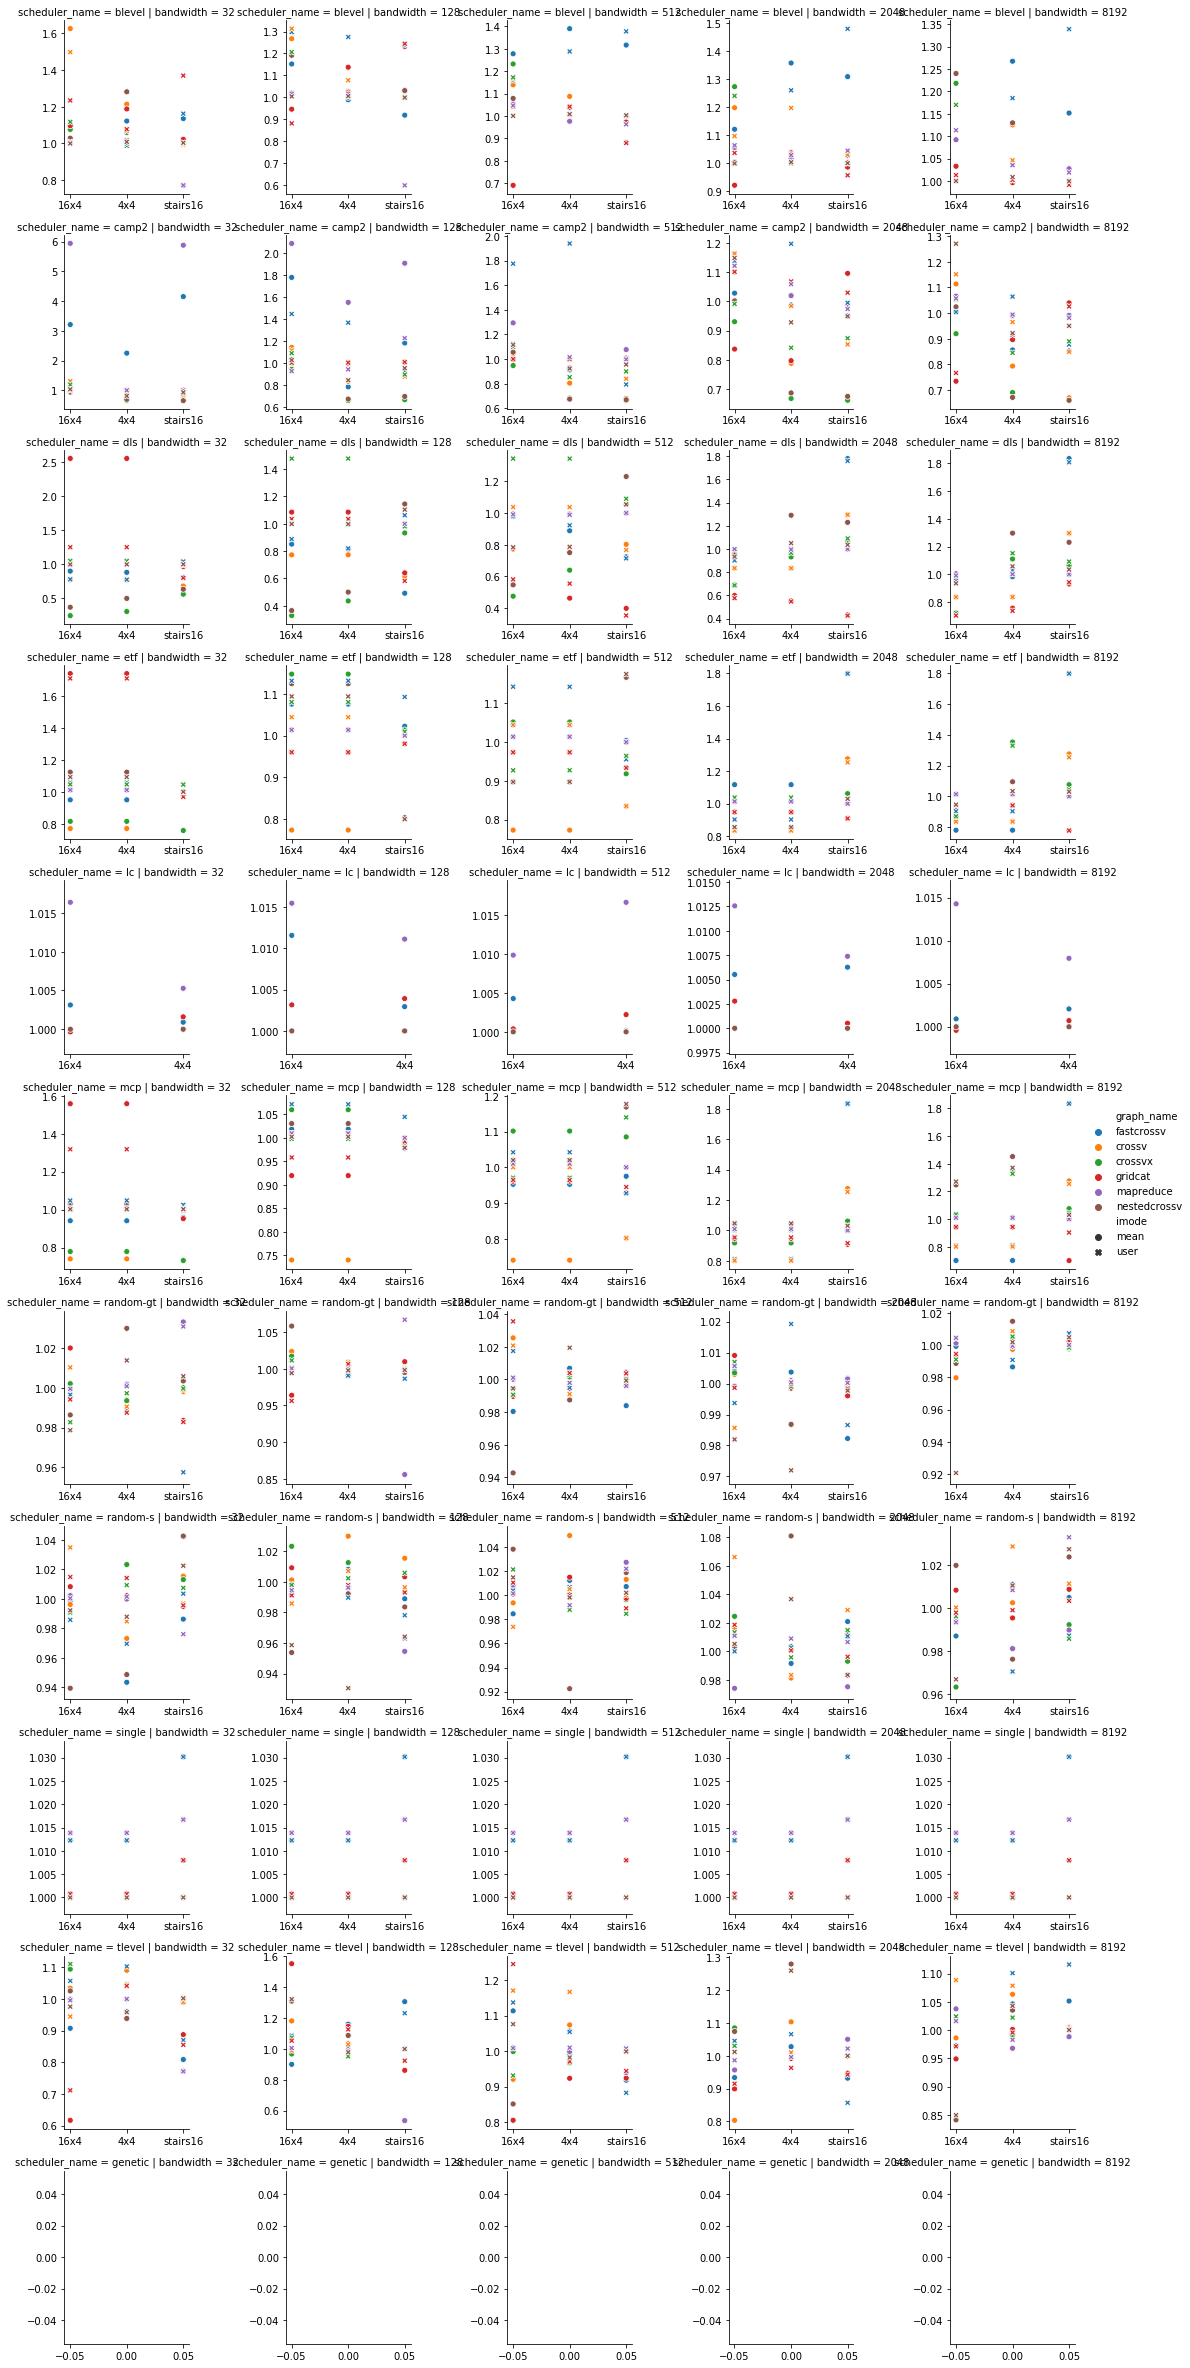

In [10]:
irw = imodes[(imodes["graph_set"] == "irw") & (imodes["imode"] != "exact")]
g = sns.FacetGrid(irw, col="bandwidth", row="scheduler_name", sharey=False, sharex=False)
def draw(**kw):
    data = kw["data"]
    data["bandwidth"] = data["bandwidth"].astype(str)
    ax = sns.scatterplot(data=data, x="cluster_name", y="exact_ratio", style="imode", hue="graph_name")
    #ax.set(yscale="log")
g.map_dataframe(draw).add_legend()

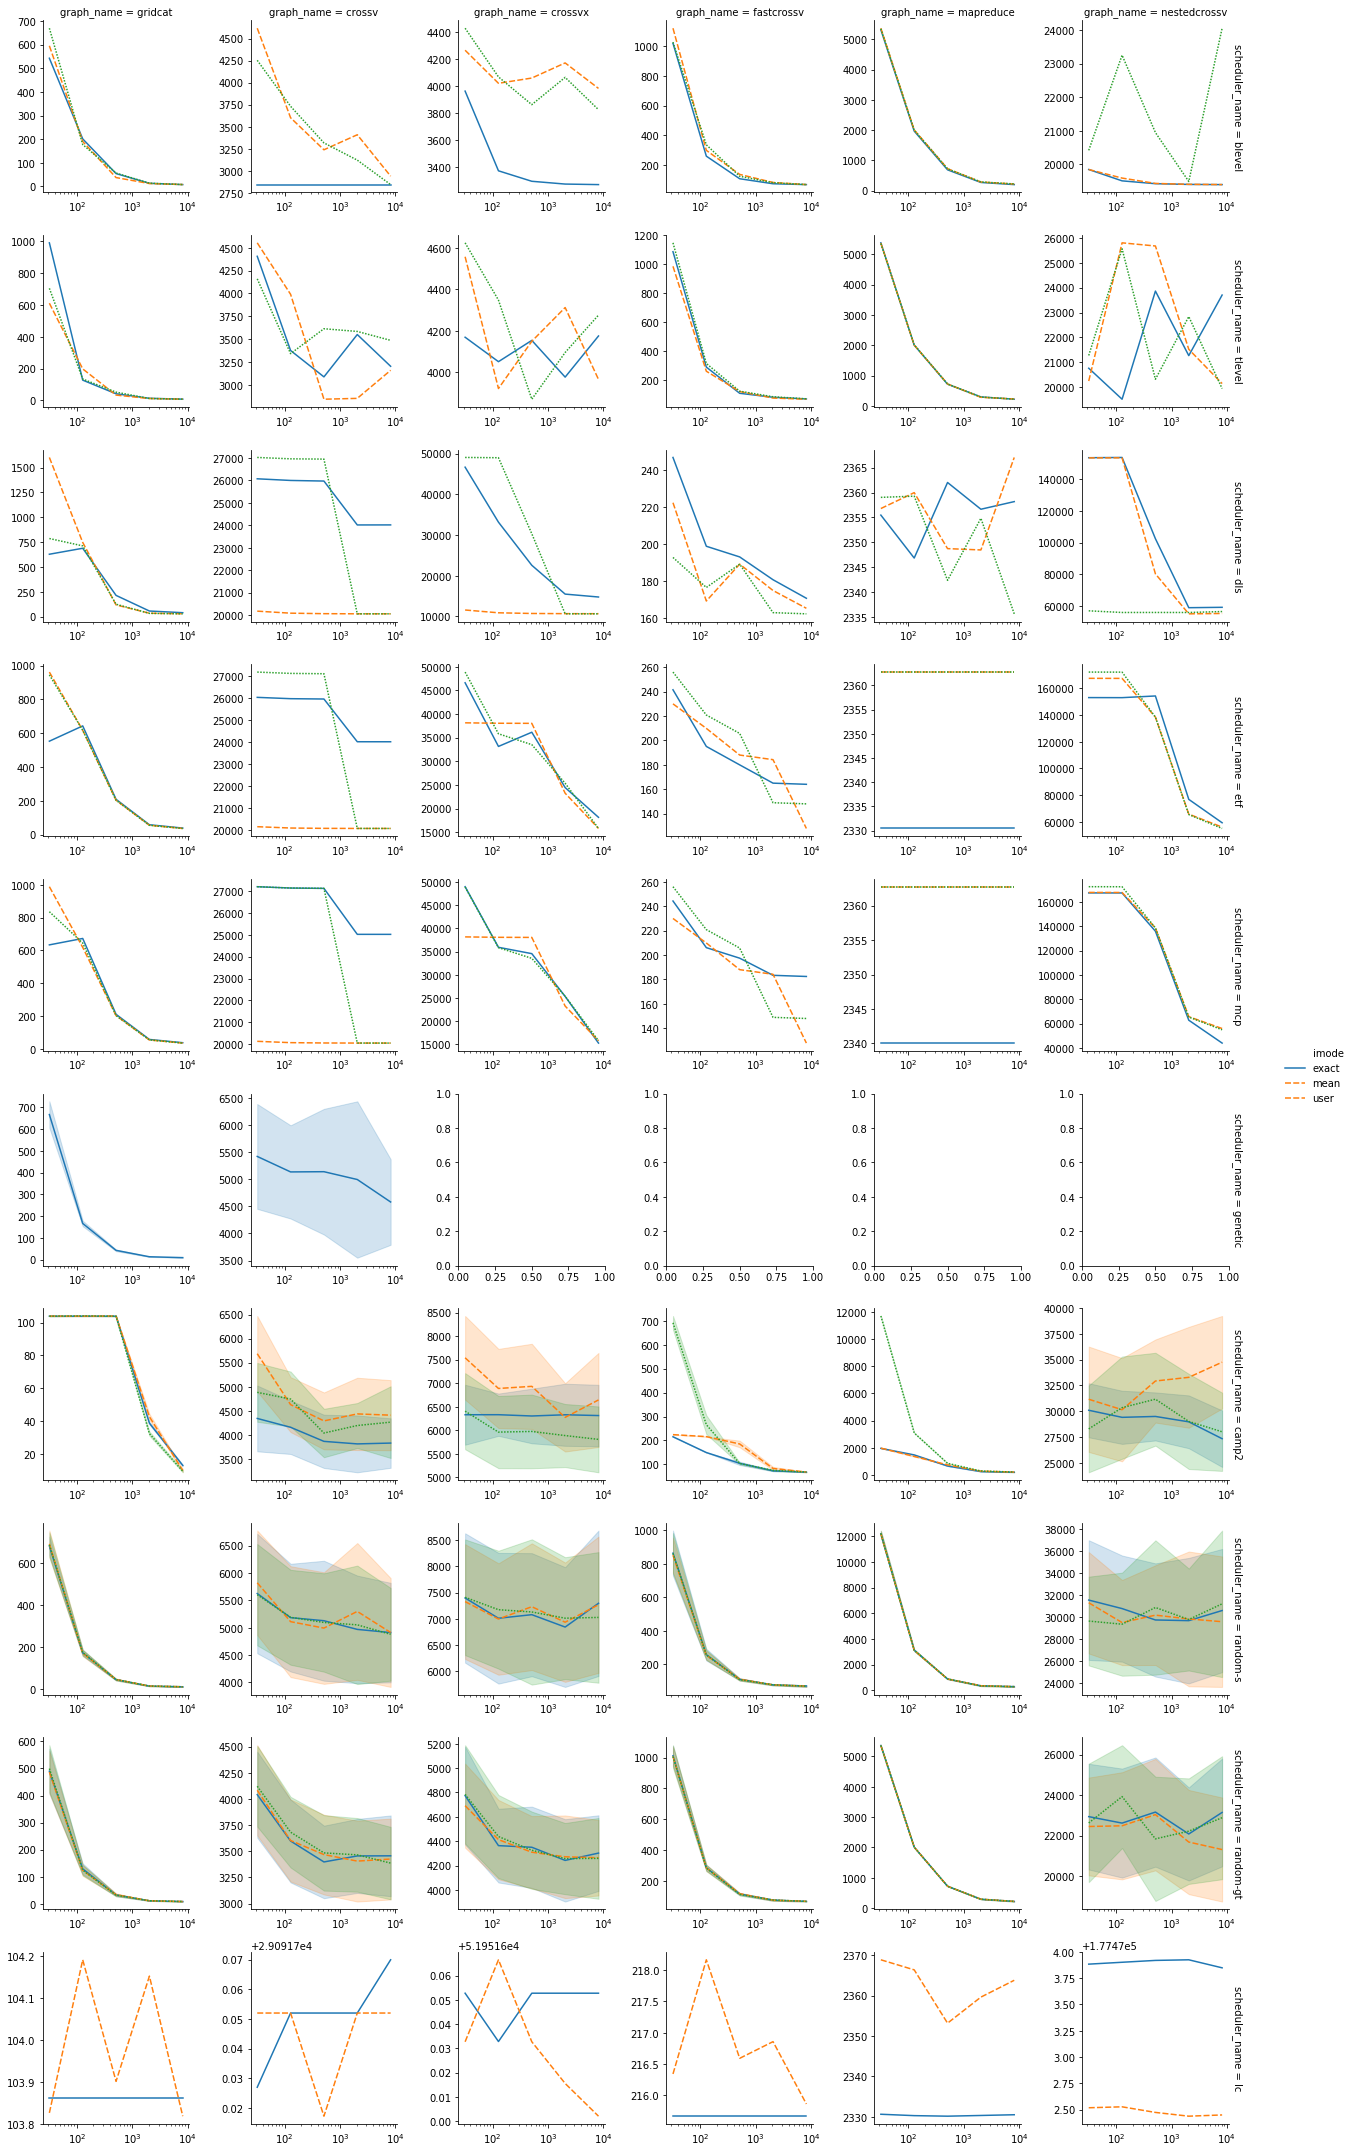

In [28]:
# Imode
dd = filtered3
firw = pd.DataFrame(dd[(dd["scheduler_name"] != "single") & 
                       (dd["cluster_name"] == "16x4") &
                       (dd["imode"].isin(("exact", "user", "mean"))) &
                       (dd["graph_set"] == "irw")])
splot(firw, "graph_name", "scheduler_name", x="bandwidth", y="time", hue="imode", style="imode", sharey=False)